# Loading/Preparing MNIST fashion data set

## Loading the MNIST fashion data set

In [0]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#Model #1: Underfitting

At first, I used a model with one hidden layer containing a single neuron.  This was giving my test accuracy of less then 0.5, which is bad.  I added just one more neuron to the hidden layer and drastically improved my accuracy to over 70%.

## Build the model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(2, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 76us/sample - loss: 1.4920 - acc: 0.4593 - val_loss: 1.1675 - val_acc: 0.5605
Epoch 2/20
60000/60000 [==============================] - 4s 65us/sample - loss: 1.0127 - acc: 0.6384 - val_loss: 0.9342 - val_acc: 0.6769
Epoch 3/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.8698 - acc: 0.6971 - val_loss: 0.8483 - val_acc: 0.7057
Epoch 4/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.8182 - acc: 0.7096 - val_loss: 0.8363 - val_acc: 0.7041
Epoch 5/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.7947 - acc: 0.7157 - val_loss: 0.8068 - val_acc: 0.7160
Epoch 6/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.7818 - acc: 0.7189 - val_loss: 0.7966 - val_acc: 0.7062
Epoch 7/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.7710 - acc: 0.7220 - val_loss: 0.

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.7703 - acc: 0.7309
Test accuracy: 0.7309


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

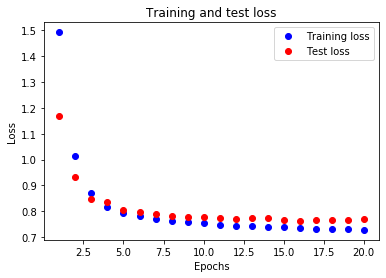

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

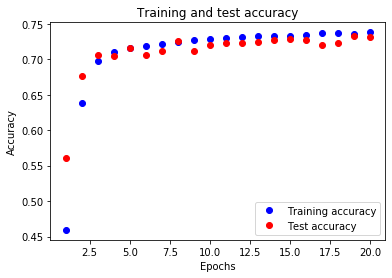

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model #2: Overfitting

## Build the model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 112us/sample - loss: 0.4870 - acc: 0.8274 - val_loss: 0.4353 - val_acc: 0.8449
Epoch 2/20
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3661 - acc: 0.8672 - val_loss: 0.3933 - val_acc: 0.8533
Epoch 3/20
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3293 - acc: 0.8798 - val_loss: 0.3843 - val_acc: 0.8577
Epoch 4/20
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3062 - acc: 0.8866 - val_loss: 0.3548 - val_acc: 0.8732
Epoch 5/20
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2873 - acc: 0.8928 - val_loss: 0.3579 - val_acc: 0.8682
Epoch 6/20
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2736 - acc: 0.8981 - val_loss: 0.3272 - val_acc: 0.8853
Epoch 7/20
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2596 - acc: 0.9028 - val_l

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.3806 - acc: 0.8885
Test accuracy: 0.8885


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

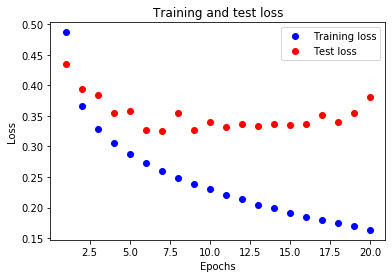

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

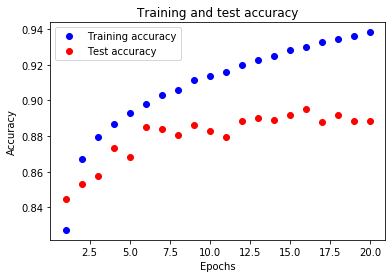

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model #3: Pretty Good Fit

Since the original model provided to us was getting pretty good accuracy but was clearly overfitting, I just added dropout to the model to fight the overfitting. The result is pretty good and the accuracy isn't bad.

I tried using 256 neurons in first hidden layer and changing the number of epochs from 5 to 30, and tweaking several other parameters but was not able to get accuracy to exceed 89%.

## Build the model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 173us/sample - loss: 0.6151 - acc: 0.7840 - val_loss: 0.4517 - val_acc: 0.8329
Epoch 2/20
60000/60000 [==============================] - 9s 143us/sample - loss: 0.4712 - acc: 0.8311 - val_loss: 0.4206 - val_acc: 0.8475
Epoch 3/20
60000/60000 [==============================] - 9s 146us/sample - loss: 0.4390 - acc: 0.8421 - val_loss: 0.3991 - val_acc: 0.8535
Epoch 4/20
60000/60000 [==============================] - 9s 148us/sample - loss: 0.4167 - acc: 0.8485 - val_loss: 0.3811 - val_acc: 0.8625
Epoch 5/20
60000/60000 [==============================] - 9s 145us/sample - loss: 0.4034 - acc: 0.8523 - val_loss: 0.3852 - val_acc: 0.8586
Epoch 6/20
60000/60000 [==============================] - 9s 148us/sample - loss: 0.3939 - acc: 0.8560 - val_loss: 0.3811 - val_acc: 0.8627
Epoch 7/20
60000/60000 [==============================] - 9s 145us/sample - loss: 0.3831 - acc: 0.8604 - val_

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 60us/sample - loss: 0.3529 - acc: 0.8782
Test accuracy: 0.8782


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

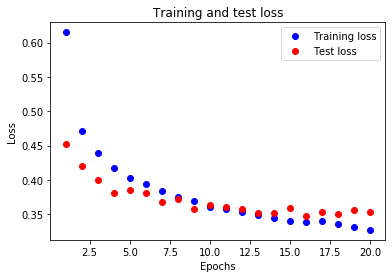

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

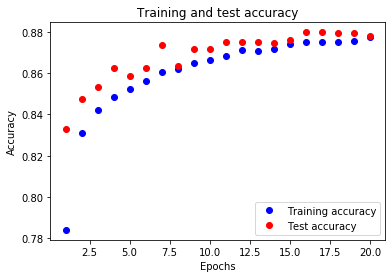

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Make predictions

In [0]:
predictions = model.predict(test_images)

In [0]:
index = 0
predictions[index]

array([2.9290161e-08, 1.9359080e-10, 7.1091175e-11, 9.6712395e-13,
       8.8301816e-10, 2.2591840e-02, 8.7031751e-09, 6.8206191e-02,
       1.9256417e-07, 9.0920174e-01], dtype=float32)

In [0]:
np.argmax(predictions[index])

9

In [0]:
test_labels[index]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

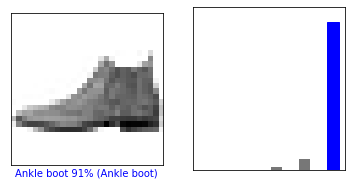

In [0]:
index = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(index, predictions,  test_labels)


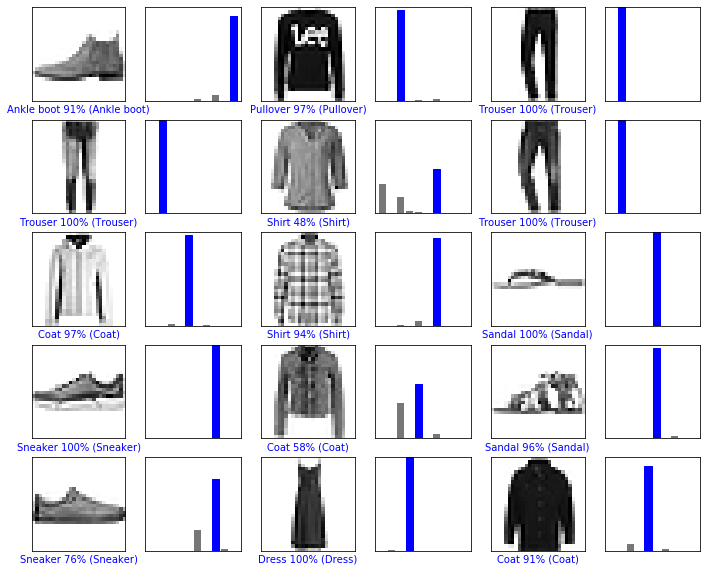

In [0]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


## Make prediction about a single image

In [0]:
index = 0
test_image = test_images[index]
print(test_image.shape)

(28, 28)


In [0]:
# Add the image to a batch where it's the only member
test_image_single = (np.expand_dims(test_image, 0))
print(test_image_single.shape)

(1, 28, 28)


In [0]:
predictions_single = model.predict(test_image_single)
print(predictions_single)

[[2.9290156e-08 1.9359075e-10 7.1091300e-11 9.6712753e-13 8.8301960e-10
  2.2591852e-02 8.7031733e-09 6.8206295e-02 1.9256468e-07 9.0920156e-01]]


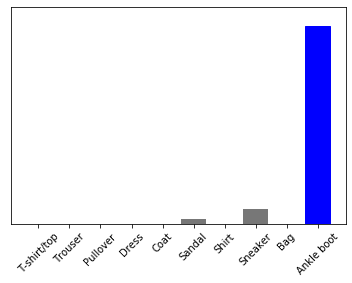

In [0]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

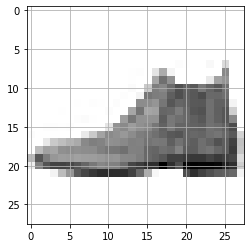

In [0]:
plt.imshow(test_image, cmap=plt.cm.binary)
plt.grid(None)

In [0]:
np.argmax(predictions_single[0])

9

In [0]:
test_labels[index]

9